In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import everygrams
from nltk.tokenize import sent_tokenize
import nltk

In [27]:
class WordFrequency:
    def __init__(self, ngram, data, given_words=[]):
        self.ngram = ngram
        self.data = data
        self.fdist = FreqDist()
        self.given_words = given_words
        
    def run(self):
        stop_words = set(stopwords.words('turkish'))

        for text in self.data:    
            sentences = sent_tokenize(text.lower())
            for sentence in sentences:
                word_tokens = word_tokenize(sentence.lower())
                filtered_sentence = []

                for w in word_tokens:
                    if w not in stop_words and w.isalnum():
                        filtered_sentence.append(w)

                listedGrams = everygrams(filtered_sentence, self.ngram, self.ngram)
                filteredGrams = []

                if self.given_words:

                    for l in listedGrams:
                        for x in l:
                            for w in self.given_words:
                                if w in x:
                                    filteredGrams.append(l)

                self.fdist += nltk.FreqDist(filteredGrams if filteredGrams else listedGrams)
    
    def plot(self, size=10):
        self.fdist.plot(size)

In [28]:
import json
import pandas as pd    
from IPython.display import JSON

data = []

for i in range(1,5):
    filename = "data_" + str(i) + ".json"
    # Opening JSON file
    f = open(filename)

    # returns JSON object as 
    # a dictionary
    data_json = json.load(f)
    print(len(data_json))
    data.append(data_json)

    f.close()

1796
2278
1994
2171


In [29]:
df = []

for d in data:
    djs = pd.json_normalize(d)
    djs = djs['ClaimBucket.claimIssue.description']
    djs.name = "description"
    
    df.append(djs)

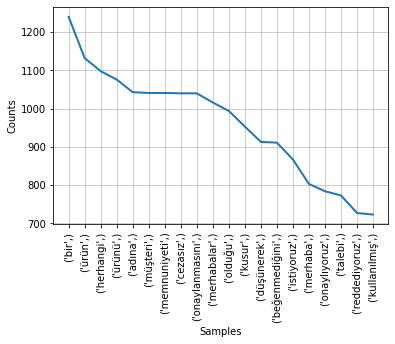

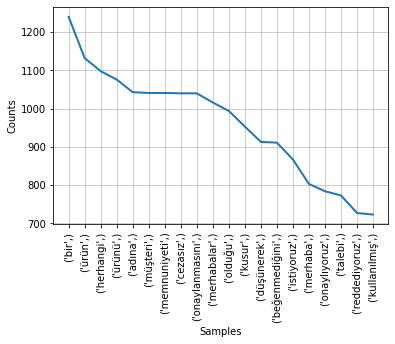

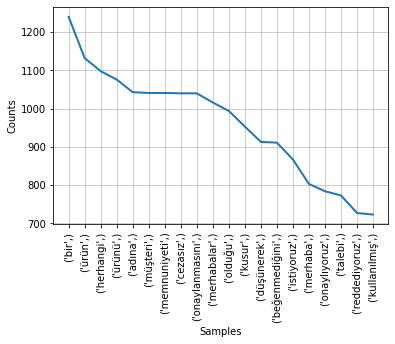

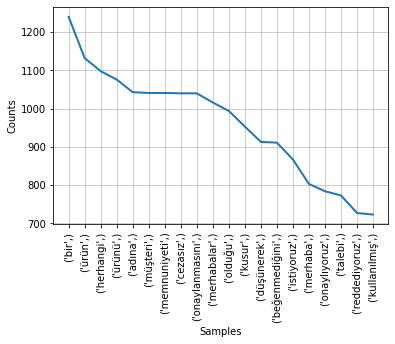

In [61]:
given = []
for i in range(0,4):
    wf = WordFrequency(1, df[3], given)
    wf.run()
    wf.plot(20)